# Deep Learning: Classification of Cats, Dogs, Bikes and Cars

## Initial Model

In [27]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same",
                        input_shape=(32, 32, 3))) #we need to specify the size of images, 150 x 150 in our case
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #alternatively we could use the softmax activation function, in which case you should change the learning rate

In [28]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.1),
            metrics=['acc'])


In [29]:

train_dir = '~path\\train'
val_dir ='~path\\val'
test_dir = '~path\\test'

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical') #we only have two classes

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [30]:
print ("start..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

start..
Epoch 1/10
100/100 [==============================] - 101s 1s/step - loss: 11.8042 - acc: 0.2630 - val_loss: 11.6795 - val_acc: 0.2754
Epoch 2/10
100/100 [==============================] - 97s 974ms/step - loss: 11.8737 - acc: 0.2633 - val_loss: 12.1007 - val_acc: 0.2492
Epoch 3/10
100/100 [==============================] - 97s 966ms/step - loss: 11.7662 - acc: 0.2700 - val_loss: 11.6633 - val_acc: 0.2764
Epoch 4/10
100/100 [==============================] - 97s 974ms/step - loss: 11.8843 - acc: 0.2627 - val_loss: 12.0845 - val_acc: 0.2503
Epoch 5/10
100/100 [==============================] - 98s 981ms/step - loss: 11.8710 - acc: 0.2635 - val_loss: 11.6795 - val_acc: 0.2754
Epoch 6/10
100/100 [==============================] - 97s 967ms/step - loss: 11.8683 - acc: 0.2637 - val_loss: 11.8851 - val_acc: 0.2626
Epoch 7/10
100/100 [==============================] - 99s 991ms/step - loss: 11.9758 - acc: 0.2570 - val_loss: 11.8415 - val_acc: 0.2653
Epoch 8/10
100/100 [===============

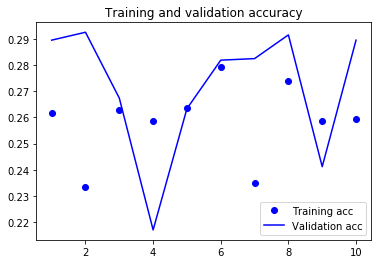

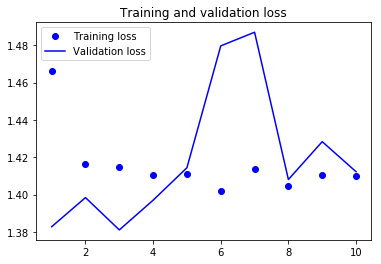

In [76]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Improving the Model:

In [31]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same",
                        input_shape=(32, 32, 3))) #we need to specify the size of images, 150 x 150 in our case
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #alternatively we could use the softmax activation function, in which case you should change the learning rate

In [32]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=0.0001),
            metrics=['acc'])


In [33]:
train_dir = '~path\\train'
val_dir ='~path\\val'
test_dir = '~path\\test'

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical') #we only have two classes

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [34]:
print ("start..")
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

start..
Epoch 1/20
100/100 [==============================] - 108s 1s/step - loss: 1.1851 - acc: 0.5193 - val_loss: 0.9380 - val_acc: 0.6362
Epoch 2/20
100/100 [==============================] - 98s 984ms/step - loss: 0.7306 - acc: 0.7127 - val_loss: 0.6745 - val_acc: 0.7146
Epoch 3/20
100/100 [==============================] - 98s 981ms/step - loss: 0.6256 - acc: 0.7163 - val_loss: 0.6078 - val_acc: 0.7357
Epoch 4/20
100/100 [==============================] - 100s 1000ms/step - loss: 0.5556 - acc: 0.7538 - val_loss: 0.5859 - val_acc: 0.7457
Epoch 5/20
100/100 [==============================] - 95s 954ms/step - loss: 0.5218 - acc: 0.7708 - val_loss: 0.7166 - val_acc: 0.6834
Epoch 6/20
100/100 [==============================] - 97s 973ms/step - loss: 0.4831 - acc: 0.7858 - val_loss: 0.5215 - val_acc: 0.7646
Epoch 7/20
100/100 [==============================] - 97s 970ms/step - loss: 0.4419 - acc: 0.8013 - val_loss: 0.5012 - val_acc: 0.7749
Epoch 8/20
100/100 [===========================

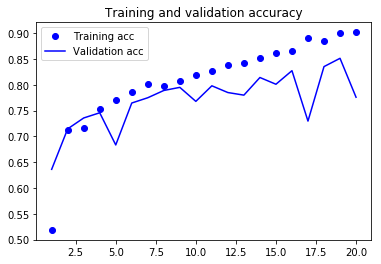

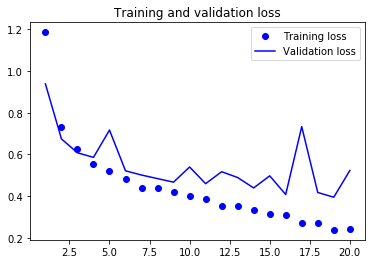

In [35]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## The accuracy is significantly improved by increasing the number of epochs to 20 and decreasing the learning rate to 0.0001. More epoches give the model more chances to update the weight and decrease the loss. The initial learning rate 0.1 is too large and may cause overshoting, so I set the learning rate to 0.0001, which is not too small and not too large.

## Further Improving the Model

In [81]:
from keras import layers
from keras import models
import time
time_duration=[]
val_accuracy=[]

for learning_rate in [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]:

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same",
                            input_shape=(32, 32, 3))) #we need to specify the size of images, 150 x 150 in our case
    model.add(layers.MaxPooling2D((2, 2), padding="same"))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2), padding="same"))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2), padding="same"))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(layers.MaxPooling2D((2, 2), padding="same"))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='softmax')) #alternatively we could use the softmax activation function, in which case you should change the learning rate

    from keras import optimizers
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=learning_rate),
                metrics=['acc'])


    train_dir = '~path\\train'
    val_dir ='~path\\val'
    test_dir = '~path\\test'

    from keras.preprocessing.image import ImageDataGenerator
    train_datagen = ImageDataGenerator(rescale=1./255) #rescale the tensor values to [0,1]
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(32, 32),
            batch_size=20,
            class_mode='categorical') #we only have two classes

    validation_generator = test_datagen.flow_from_directory(
            val_dir,
            target_size=(32, 32),
            batch_size=20,
            class_mode='categorical')

    print ("start..")
    start_time = time.time()
    history = model.fit_generator(
          train_generator,
          steps_per_epoch=100,
          epochs=20,
          validation_data=validation_generator,
          validation_steps=50)
    duration=time.time() - start_time
    print('Running Time: '+str(duration))
    time_duration.append(duration)
    val_accuracy.append(history.history['val_acc'][-1])

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
start..
Epoch 1/20
100/100 [==============================] - 101s 1s/step - loss: 1.3888 - acc: 0.2560 - val_loss: 1.3936 - val_acc: 0.2804
Epoch 2/20
100/100 [==============================] - 99s 989ms/step - loss: 1.3893 - acc: 0.2727 - val_loss: 1.3952 - val_acc: 0.2734
Epoch 3/20
100/100 [==============================] - 100s 1s/step - loss: 1.3884 - acc: 0.2745 - val_loss: 1.3936 - val_acc: 0.2985
Epoch 4/20
100/100 [==============================] - 101s 1s/step - loss: 1.3894 - acc: 0.2720 - val_loss: 1.3908 - val_acc: 0.2955
Epoch 5/20
100/100 [==============================] - 98s 983ms/step - loss: 1.3873 - acc: 0.2837 - val_loss: 1.3935 - val_acc: 0.2975
Epoch 6/20
100/100 [==============================] - 96s 964ms/step - loss: 1.3878 - acc: 0.2842 - val_loss: 1.3909 - val_acc: 0.3152
Epoch 7/20
100/100 [==============================] - 96s 959ms/step - loss: 1.3863 - acc: 0.2835 - val_l

Epoch 19/20
100/100 [==============================] - 97s 975ms/step - loss: 0.6181 - acc: 0.7588 - val_loss: 0.6986 - val_acc: 0.6945
Epoch 20/20
100/100 [==============================] - 96s 961ms/step - loss: 0.6177 - acc: 0.7595 - val_loss: 0.6739 - val_acc: 0.6955
Running Time: 1931.917799949646
Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
start..
Epoch 1/20
100/100 [==============================] - 97s 968ms/step - loss: 1.1637 - acc: 0.5258 - val_loss: 0.9136 - val_acc: 0.6271
Epoch 2/20
100/100 [==============================] - 97s 967ms/step - loss: 0.7345 - acc: 0.6932 - val_loss: 0.7152 - val_acc: 0.6874
Epoch 3/20
100/100 [==============================] - 96s 956ms/step - loss: 0.5982 - acc: 0.7327 - val_loss: 0.5955 - val_acc: 0.7457
Epoch 4/20
100/100 [==============================] - 97s 974ms/step - loss: 0.5412 - acc: 0.7732 - val_loss: 0.5477 - val_acc: 0.7558
Epoch 5/20
100/100 [==============================] - 96s 961ms/s

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
time_duration

[1942.9371745586395,
 1923.9225454330444,
 1931.917799949646,
 1918.9893980026245,
 1923.2357306480408,
 1923.8439738750458,
 1928.096937417984]

In [83]:
val_accuracy

[0.2783919630113559,
 0.37989950075221424,
 0.6954773862158233,
 0.7778894466970434,
 0.8100502547906272,
 0.2532663344588112,
 0.27035176222348334]

In [84]:
lr_rate=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1]
for i in range(len(lr_rate)):
    print('For learning rate = '+str(lr_rate[i])+ ', the accuracy is '+str(val_accuracy[i])+' and the running time is '+str(time_duration[i]))

For learning rate = 1e-07, the accuracy is 0.2783919630113559 and the running time is 1942.9371745586395
For learning rate = 1e-06, the accuracy is 0.37989950075221424 and the running time is 1923.9225454330444
For learning rate = 1e-05, the accuracy is 0.6954773862158233 and the running time is 1931.917799949646
For learning rate = 0.0001, the accuracy is 0.7778894466970434 and the running time is 1918.9893980026245
For learning rate = 0.001, the accuracy is 0.8100502547906272 and the running time is 1923.2357306480408
For learning rate = 0.01, the accuracy is 0.2532663344588112 and the running time is 1923.8439738750458
For learning rate = 0.1, the accuracy is 0.27035176222348334 and the running time is 1928.096937417984


## I noticed that accuracy is much lower when learning rate is lower than 1e-05 or higher than 0.01, and the accuracy is higher when the learning rate is between 0.001 and 0.0001. Therefore, I can conclude that the optimal learning rate exists in this interval.

## Fitting with Pretrained Model:

In [60]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, #we are going to remove the top layer, VGG was trained for 1000 classes, here we only have two
                  input_shape=(48,48, 3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [66]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 1028      
Total params: 14,847,044
Trainable params: 132,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [67]:
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 1028      
Total params: 14,847,044
Trainable params: 132,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [68]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=20,
        class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/20
100/100 [==============================] - 76s 762ms/step - loss: 1.2597 - acc: 0.4468 - val_loss: 0.9591 - val_acc: 0.7186
Epoch 2/20
100/100 [==============================] - 79s 789ms/step - loss: 1.0108 - acc: 0.6368 - val_loss: 0.7701 - val_acc: 0.7668
Epoch 3/20
100/100 [==============================] - 77s 767ms/step - loss: 0.8544 - acc: 0.7077 - val_loss: 0.7027 - val_acc: 0.7276
Epoch 4/20
100/100 [==============================] - 80s 799ms/step - loss: 0.8040 - acc: 0.7075 - val_loss: 0.6018 - val_acc: 0.7990
Epoch 5/20
100/100 [==============================] - 94s 937ms/step - loss: 0.7253 - acc: 0.7347 - val_loss: 0.5895 - val_acc: 0.7809
Epoch 6/20
100/100 [==============================] - 102s 1s/step - loss: 0.6920 - acc: 0.7408 - val_loss: 0.5490 - val_acc: 0.8131
Epoch 7/20
100/100 [==============================] - 103s 1s/step - loss: 0.6534 - acc: 0.7543 - val_loss: 0

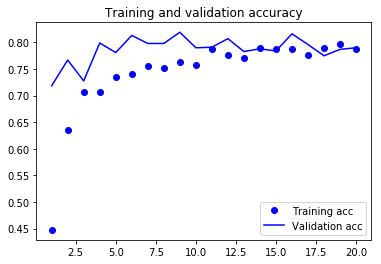

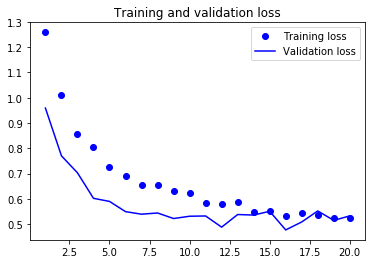

In [69]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## From the plot, I noticed that the training loss curve and the validation loss curve converge to almost the same value as the number of epoches increases, implying that the model fits quite well.